# Linear Regression

In [376]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [377]:
def set_default(figsize=(8, 5), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


set_default()

In [378]:
# Dataset

x_train = np.random.rand(
    100,
)  # 100 random numbers between 0 and 1

noise = np.random.normal(
    0,
    0.1,
    x_train.shape,
)  # 100 random numbers with normal distribution

y_train = x_train * 2 + 5 + noise

x_train = x_train.astype(np.float32)
noise = noise.astype(np.float32)
y_train = y_train.astype(np.float32)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [379]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.01

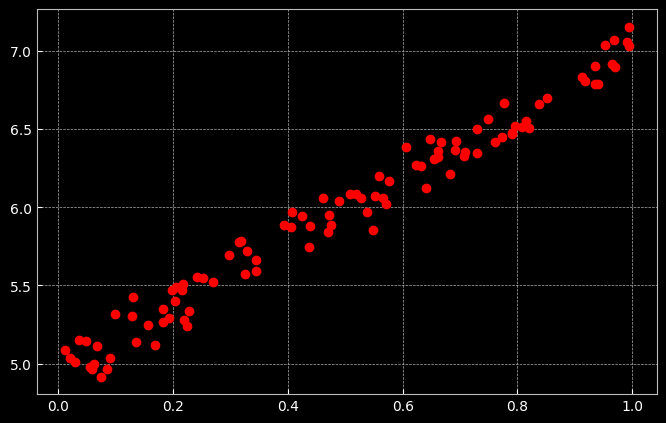

In [380]:
# plot the training data
plt.plot(x_train, y_train, "ro", label="Original data")

In [381]:
# Linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        return self.linear(x)

In [382]:
model = LinearRegression(input_size, output_size)

In [383]:
# check the parameters of the linear model
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[-0.0999]], requires_grad=True)
linear.bias Parameter containing:
tensor([0.3325], requires_grad=True)


In [384]:
# Loss Function
criterion = nn.MSELoss()

# Optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [385]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()  # clear the gradients, otherwise they will accumulate
    loss.backward()  # compute the gradients
    optimizer.step()  # update the weights

    # print the loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")

Epoch [5/200], Loss: 26.6460
Epoch [10/200], Loss: 20.6615
Epoch [15/200], Loss: 16.0218
Epoch [20/200], Loss: 12.4247
Epoch [25/200], Loss: 9.6359
Epoch [30/200], Loss: 7.4738
Epoch [35/200], Loss: 5.7975
Epoch [40/200], Loss: 4.4979
Epoch [45/200], Loss: 3.4903
Epoch [50/200], Loss: 2.7092
Epoch [55/200], Loss: 2.1035
Epoch [60/200], Loss: 1.6340
Epoch [65/200], Loss: 1.2699
Epoch [70/200], Loss: 0.9876
Epoch [75/200], Loss: 0.7688
Epoch [80/200], Loss: 0.5991
Epoch [85/200], Loss: 0.4676
Epoch [90/200], Loss: 0.3656
Epoch [95/200], Loss: 0.2865
Epoch [100/200], Loss: 0.2251
Epoch [105/200], Loss: 0.1776
Epoch [110/200], Loss: 0.1407
Epoch [115/200], Loss: 0.1121
Epoch [120/200], Loss: 0.0899
Epoch [125/200], Loss: 0.0727
Epoch [130/200], Loss: 0.0593
Epoch [135/200], Loss: 0.0490
Epoch [140/200], Loss: 0.0409
Epoch [145/200], Loss: 0.0347
Epoch [150/200], Loss: 0.0298
Epoch [155/200], Loss: 0.0260
Epoch [160/200], Loss: 0.0231
Epoch [165/200], Loss: 0.0208
Epoch [170/200], Loss: 0.0

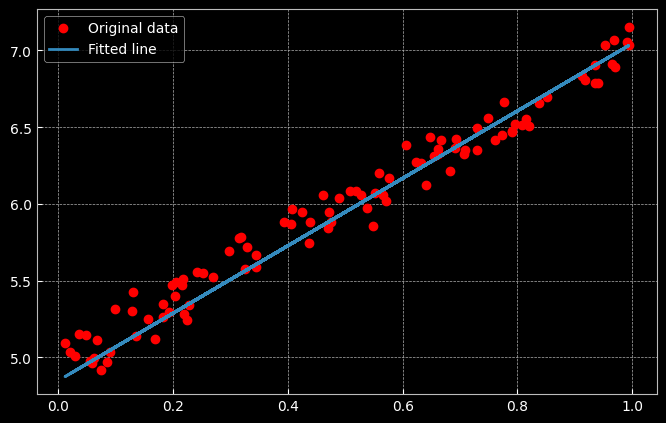

In [386]:
# Plot the graph
inputs = torch.from_numpy(x_train)

predicted = model(inputs).detach().numpy()
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()